In [24]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
f = open("vectors.txt","r")
image_indices = {}
image_vectors = []
list = f.readlines()
for ind, line in enumerate(list):
    splited_line = line.rstrip('\r\n').split(' ')
    embedding = [float(x) for x in splited_line[0:]]
    image_indices[ind] = embedding
    image_vectors.append(embedding)
    
X = np.array(image_vectors)
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
pickle.dump(image_indices, open( "embeddings.pkl", "wb" ))

In [21]:
knn_indices = {}
knn_distances = {}
for key in image_indices.keys():
    distances, indices = nbrs.kneighbors([image_indices[key]])
    knn_indices[key] = indices[0]
    knn_distances[key] = distances[0]

{0: array([  0.        ,  24.13904896,  26.81241344,  31.56392175,  31.73915689]), 1: array([  0.        ,  32.92987049,  33.2837835 ,  34.65267303,  35.7722755 ]), 2: array([  0.        ,  28.78032889,  30.33726166,  31.81502296,  31.88558581]), 3: array([  0.        ,  33.63872323,  34.43274196,  34.93043218,  35.14704163]), 4: array([  0.        ,  40.0094162 ,  40.14037676,  40.42272409,  40.69059816]), 5: array([  0.        ,  25.70531332,  26.24640141,  29.32960734,  32.14691728]), 6: array([  0.        ,  26.89950461,  26.9713844 ,  27.41989974,  27.51713959]), 7: array([  0.        ,  22.78797445,  22.84625938,  24.62855966,  24.81652719]), 8: array([  0.        ,  26.01561237,  28.18284628,  28.41380561,  28.49809649]), 9: array([  0.        ,  22.94500914,  23.18802561,  24.14363158,  24.81652719]), 10: array([  0.        ,  26.37199012,  26.86523069,  27.18003036,  27.51713959]), 11: array([  0.        ,  23.98238037,  27.99144158,  28.96552239,  30.13757107]), 12: array([  

In [22]:
import pickle
pickle.dump(knn_indices, open( "knn_indices.pkl", "wb" ))
pickle.dump(knn_distances, open( "knn_distances.pkl", "wb" ))

In [9]:
input = open("images.txt","r")
index_to_titles = {}
titles = input.readlines()
for ind, title in enumerate(titles):
    index_to_titles[ind] = title

In [10]:
import os
from IPython.display import Image,display


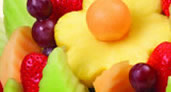

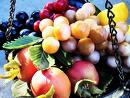

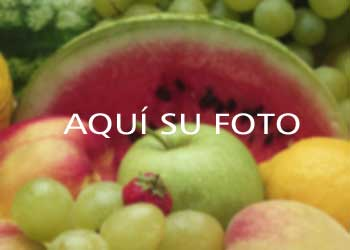

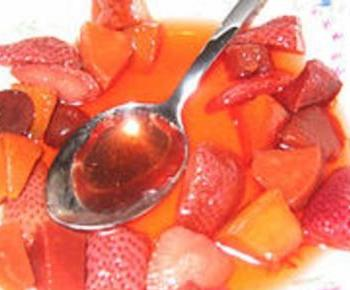

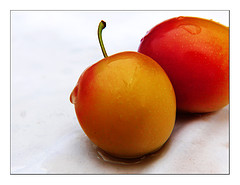

In [25]:
from matplotlib import pyplot as plt
#give any id from 0 to 534 in the following line and check
#pictures look really relevant to me
names = [index_to_titles[index] for index in knn_indices[211]]
for name in names:
    img = Image(filename = str(name).rstrip('\r\n'))
    display(img)



In [1]:
import pickle

pkl = open("knn_indices.pkl","rb")
knn_indices = pickle.load(pkl)

edges = {}

for key,values in knn_indices.items():
    edges[key] = []
    #edges[key] = set()
    for val in values:
        ls = edges.get(key)
        ls.append(val)
        edges[key] = ls
 
pickle.dump(edges, open("images_graph_edges.pkl", "wb" ))



In [4]:
import networkx as nx

edges_file = open("images_graph_edges.pkl","rb")
edges = pickle.load(edges_file)
G=nx.from_dict_of_lists(edges)
pr = nx.pagerank(G, alpha=0.85)

In [23]:
file = open("output.txt","r")
lines = file.readlines()
classes = {}
key = 0
for line in lines:
    classification = line.rstrip('\r\n').split(':')
    classes[key] = classification[1].split(' ')[2]
    key = key+1
pickle.dump(classes, open( "cluster_ids.pkl", "wb" ))